<a href="https://colab.research.google.com/github/molinacle/desafio_latam/blob/main/Desaf%C3%ADo_Latam_Desaf%C3%ADo_6_Modelos_Avanzados_y_Redes_Neuronales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DESAFÍO LATAM - DESAFÍO 6 MODELOS AVANZADOS**
---

*   ALUMNO: SEBASTIÁN MOLINA
*   MODULO: MODELOS AVANZADOS Y REDES NEURONALES
*   CARRERA: DATA SCIENCE

#Desarrollo de un Modelo de Red Neuronal Convolucional para detección de imágenes.

En esta oportunidad buscaremos entrenar redes neuronales convolucionales para un conjunto de imágenes que corresponden a escenarios naturales del mundo, con seis diferentes clases:
-  **buildings:** Para escenarios con edificios
- **forest:** Escenarios de bosques
- **glacier:** Glaciares
- **mountain:** Escenarios con montañas
- **sea:** Imágenes con mar
- **street:** Escenarios de ciudad

---

##Paso 1: Importación de datos y preprocesamiento

En este primer paso, importaremos los conjuntos de datos proporcionados, exploraremos su estructura y realizaremos el preprocesamiento necesario para preparar los datos para el entrenamiento de nuestros modelos. También visualizaremos algunas imágenes aleatorias del conjunto de entrenamiento y codificaremos las etiquetas utilizando OneHotEncoder.



In [82]:
# Importar las librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Importar las librerías necesarias de Keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Flatten, Dropout, Dense

#### Cargar los conjuntos de datos

In [3]:
# Cargar los datos serializados (pickle) con allow_pickle=True
train_X = np.load('cnn_train_X.npy', allow_pickle=True)
train_y = np.load('cnn_train_y.npy', allow_pickle=True)
test_X = np.load('cnn_test_X.npy', allow_pickle=True)
test_y = np.load('cnn_test_y.npy', allow_pickle=True)
pred_X = np.load('cnn_pred_X.npy', allow_pickle=True)

#### Exploración de los datos

**Cantidad de registros por categoría en el conjunto de entrenamiento**

In [4]:
# Etiquetas únicas y su conteo en el conjunto de entrenamiento
unique, counts = np.unique(train_y, return_counts=True)
print("Cantidad de registros por categoría en el conjunto de entrenamiento:")
for label, count in zip(unique, counts):
    print(f"Clase {label}: {count} muestras")

Cantidad de registros por categoría en el conjunto de entrenamiento:
Clase buildings: 2191 muestras
Clase forest: 2271 muestras
Clase glacier: 2404 muestras
Clase mountain: 2512 muestras
Clase sea: 2274 muestras
Clase street: 2382 muestras


**Cantidad de registros por categoría en el conjunto de test**

In [5]:
# Etiquetas únicas y su conteo en el conjunto de test
unique_test, counts_test = np.unique(test_y, return_counts=True)
print("\nCantidad de registros por categoría en el conjunto de test:")
for label, count in zip(unique_test, counts_test):
    print(f"Clase {label}: {count} muestras")


Cantidad de registros por categoría en el conjunto de test:
Clase buildings: 437 muestras
Clase forest: 474 muestras
Clase glacier: 553 muestras
Clase mountain: 525 muestras
Clase sea: 510 muestras
Clase street: 501 muestras


#### Visualización de imágenes aleatorias del conjunto de entrenamiento

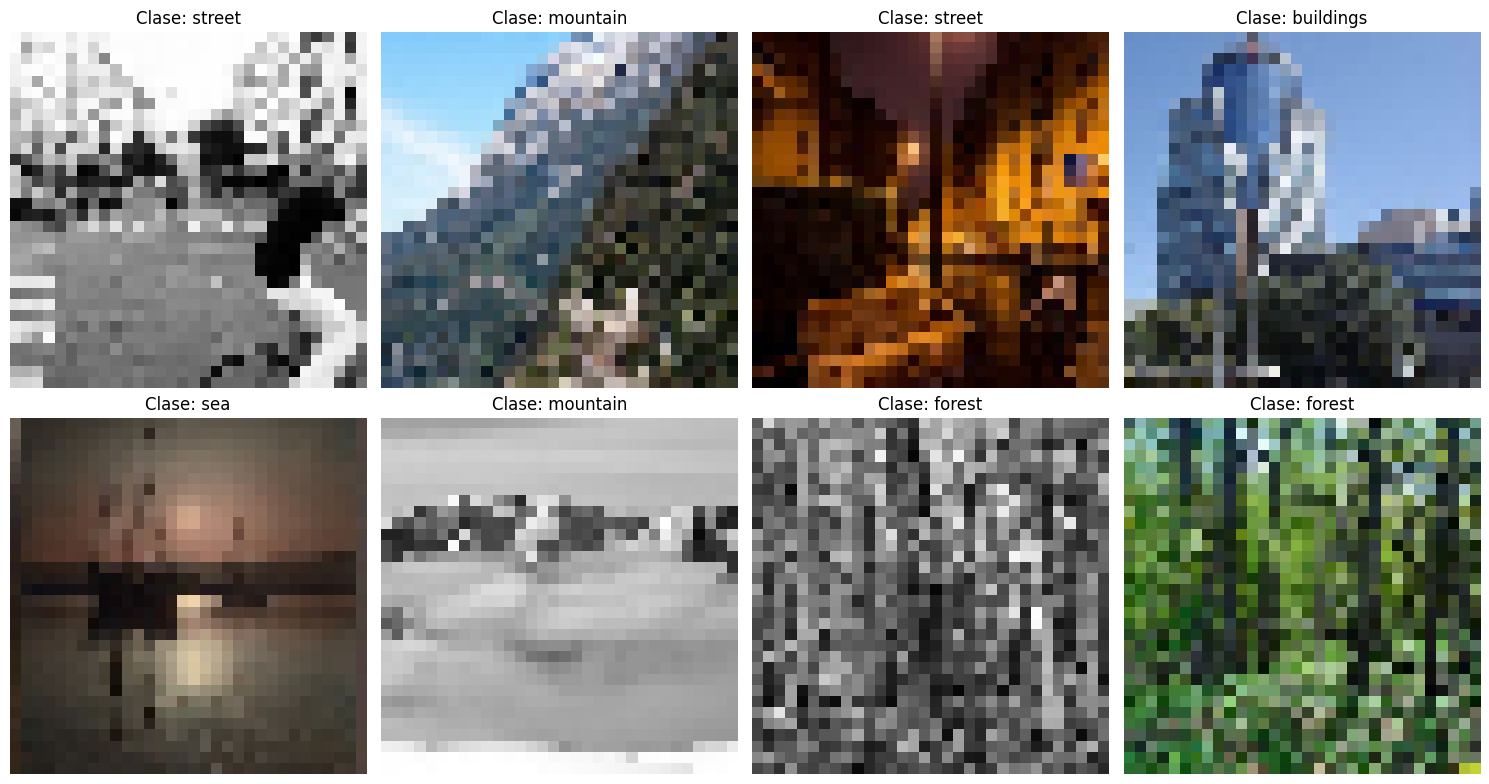

In [7]:
# Definición de etiquetas
class_labels = ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

# Seleccionar 8 índices aleatorios
random_indices = random.sample(range(train_X.shape[0]), 8)

# Crear subplots para mostrar las imágenes
fig, axes = plt.subplots(2, 4, figsize=(15, 8))

for idx, ax in zip(random_indices, axes.flatten()):
    ax.imshow(train_X[idx])
    label = train_y[idx]  # Las etiquetas ya son cadenas de texto
    ax.set_title(f"Clase: {label}")
    ax.axis('off')

plt.tight_layout()
plt.show()

#### Codificación de las etiquetas con OneHotEncoder

In [9]:
# Remodelar las etiquetas para OneHotEncoder
train_y_reshaped = train_y.reshape(-1, 1)
test_y_reshaped = test_y.reshape(-1, 1)

# Inicializar el codificador
encoder = OneHotEncoder(sparse_output=False)

# Ajustar y transformar las etiquetas de entrenamiento
train_y_encoded = encoder.fit_transform(train_y_reshaped)

# Transformar las etiquetas de test
test_y_encoded = encoder.transform(test_y_reshaped)

# Obtener las clases ordenadas
classes = encoder.categories_[0]

Con esto, hemos importado y preprocesado los datos, y estamos listos para avanzar al siguiente paso, donde implementaremos una red neuronal multicapa totalmente conectada.

---
## Paso 2: Implementación de una red neuronal multicapa Fully Connected
En este paso, construiremos una red neuronal totalmente conectada (Fully Connected) con al menos cinco capas ocultas para clasificar las imágenes. Evaluaremos su rendimiento utilizando métricas apropiadas en el conjunto de test.

#### Preprocesamiento adicional de los datos
Antes de entrenar el modelo, necesitamos aplanar las imágenes y normalizar los datos.

In [10]:
# Aplanar las imágenes
train_X_flat = train_X.reshape(train_X.shape[0], -1)
test_X_flat = test_X.reshape(test_X.shape[0], -1)

# Normalizar los datos (opcional pero recomendado)
train_X_flat = train_X_flat / 255.0
test_X_flat = test_X_flat / 255.0

#### Construcción del modelo

Utilizaremos Keras para construir la red neuronal.

In [12]:
# Definir el modelo
model_fc = Sequential()

# Capa de entrada
model_fc.add(Dense(512, activation='relu', input_shape=(train_X_flat.shape[1],)))

# Añadir al menos cinco capas ocultas
model_fc.add(Dense(256, activation='relu'))
model_fc.add(Dense(128, activation='relu'))
model_fc.add(Dense(64, activation='relu'))
model_fc.add(Dense(32, activation='relu'))

# Capa de salida
model_fc.add(Dense(6, activation='softmax'))

# Compilar el modelo
model_fc.compile(optimizer=Adam(learning_rate=0.001),
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


#### Entrenamiento del modelo

In [13]:
# Entrenar el modelo
history_fc = model_fc.fit(train_X_flat, train_y_encoded,
                          validation_data=(test_X_flat, test_y_encoded),
                          epochs=25,
                          batch_size=64)

Epoch 1/25
220/220 ━━━━━━━━━━━━━━━━━━━━ 12s 42ms/step - accuracy: 0.3014 - loss: 1.6241 - val_accuracy: 0.4393 - val_loss: 1.4071
Epoch 2/25
220/220 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - accuracy: 0.4590 - loss: 1.3479 - val_accuracy: 0.4967 - val_loss: 1.2728
Epoch 3/25
220/220 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - accuracy: 0.4988 - loss: 1.2657 - val_accuracy: 0.5200 - val_loss: 1.2309
Epoch 4/25
220/220 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - accuracy: 0.5305 - loss: 1.2032 - val_accuracy: 0.5343 - val_loss: 1.1851
Epoch 5/25
220/220 ━━━━━━━━━━━━━━━━━━━━ 11s 33ms/step - accuracy: 0.5439 - loss: 1.1599 - val_accuracy: 0.5237 - val_loss: 1.2119
Epoch 6/25
220/220 ━━━━━━━━━━━━━━━━━━━━ 11s 37ms/step - accuracy: 0.5564 - loss: 1.1307 - val_accuracy: 0.5670 - val_loss: 1.1452
Epoch 7/25
220/220 ━━━━━━━━━━━━━━━━━━━━ 11s 39ms/step - accuracy: 0.5805 - loss: 1.0980 - val_accuracy: 0.5660 - val_loss: 1.1376
Epoch 8/25
220/220 ━━━━━━━━━━━━━━━━━━━━ 9s 33ms/step - accuracy: 0.5945 - loss: 1.0561 - val_

#### Evaluación del modelo

In [15]:
# Evaluar el modelo en el conjunto de test
test_loss, test_accuracy = model_fc.evaluate(test_X_flat, test_y_encoded)
print(f"\nPérdida en el conjunto de test: {test_loss}")
print(f"Exactitud en el conjunto de test: {test_accuracy}")

94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6646 - loss: 0.9746

Pérdida en el conjunto de test: 1.0749857425689697
Exactitud en el conjunto de test: 0.6186666488647461


#### Métricas adicionales

Utilizaremos una matriz de confusión y un reporte de clasificación para analizar el rendimiento.


94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
Reporte de clasificación:
              precision    recall  f1-score   support

   buildings       0.41      0.57      0.48       437
      forest       0.81      0.74      0.78       474
     glacier       0.71      0.58      0.64       553
    mountain       0.59      0.72      0.65       525
         sea       0.58      0.42      0.48       510
      street       0.68      0.69      0.68       501

    accuracy                           0.62      3000
   macro avg       0.63      0.62      0.62      3000
weighted avg       0.63      0.62      0.62      3000



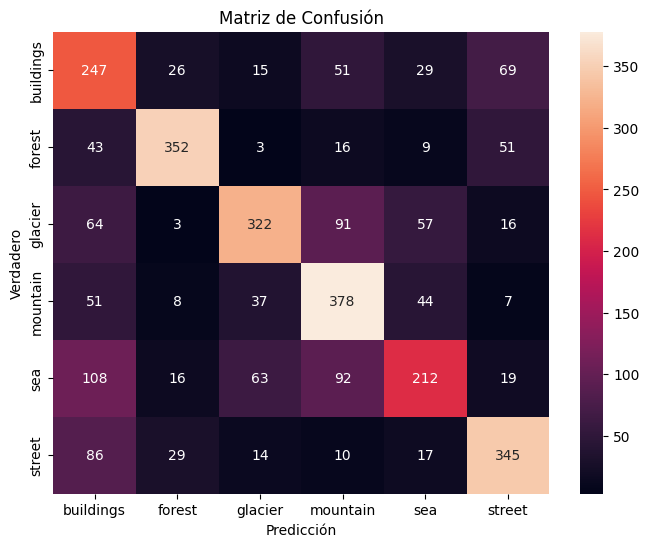

In [16]:
# Predecir las etiquetas del conjunto de test
test_predictions = model_fc.predict(test_X_flat)
test_pred_indices = np.argmax(test_predictions, axis=1)
test_pred_labels = [classes[i] for i in test_pred_indices]

# Obtener las etiquetas verdaderas
test_true_indices = np.argmax(test_y_encoded, axis=1)
test_true_labels = [classes[i] for i in test_true_indices]

# Reporte de clasificación
print("Reporte de clasificación:")
print(classification_report(test_true_labels, test_pred_labels, target_names=classes))

# Matriz de confusión
conf_matrix = confusion_matrix(test_true_labels, test_pred_labels, labels=classes)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicción')
plt.ylabel('Verdadero')
plt.title('Matriz de Confusión')
plt.show()

Con esto, hemos implementado una red neuronal multicapa totalmente conectada y evaluado su rendimiento en el conjunto de test. En el siguiente paso, desarrollaremos una red neuronal convolucional para mejorar el rendimiento.

---
##Paso 3: Desarrollo de una red neuronal convolucional
En este paso, construiremos una red neuronal convolucional (CNN) con tres o más capas convolucionales y dos o más capas densas. Nos aseguraremos de que la cantidad de parámetros a estimar se encuentre en el intervalo [3 millones, 8 millones], y entrenaremos el modelo durante 25 épocas. Finalmente, mostraremos las curvas de pérdida y exactitud para cada época.

####Preprocesamiento de datos para CNN
Las CNN requieren que las entradas sean imágenes con formato específico.

In [17]:
# Normalizar los datos
train_X_norm = train_X / 255.0
test_X_norm = test_X / 255.0

#### Construcción del modelo CNN

In [23]:
# Definir el modelo ajustado
model_cnn = Sequential()

# Bloque 1
model_cnn.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=train_X_norm.shape[1:]))
model_cnn.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model_cnn.add(MaxPooling2D((2, 2)))
model_cnn.add(Dropout(0.25))

# Bloque 2
model_cnn.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model_cnn.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model_cnn.add(MaxPooling2D((2, 2)))
model_cnn.add(Dropout(0.25))

# Bloque 3
model_cnn.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model_cnn.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model_cnn.add(MaxPooling2D((2, 2)))
model_cnn.add(Dropout(0.25))

# Aplanar y capas densas
model_cnn.add(Flatten())
model_cnn.add(Dense(1024, activation='relu'))
model_cnn.add(Dropout(0.5))
model_cnn.add(Dense(512, activation='relu'))
model_cnn.add(Dropout(0.5))

# Capa de salida
model_cnn.add(Dense(6, activation='softmax'))

# Compilar el modelo
model_cnn.compile(optimizer=Adam(learning_rate=0.0001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

#### Verificar la cantidad de parámetros

In [24]:
# Resumen del modelo para verificar parámetros
model_cnn.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_11 (Conv2D)                   │ (None, 32, 32, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 16, 16, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 8, 8, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 1024)                │       4,195,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 6)                   │           3,078 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,868,614 (22.39 MB)

 Trainable params: 5,868,614 (22.39 MB)

 Non-trainable params: 0 (0.00 B)

#### Entrenamiento del modelo


In [25]:
# Entrenar el modelo
history_cnn = model_cnn.fit(train_X_norm, train_y_encoded,
                            validation_data=(test_X_norm, test_y_encoded),
                            epochs=25,
                            batch_size=64)

Epoch 1/25
220/220 ━━━━━━━━━━━━━━━━━━━━ 396s 2s/step - accuracy: 0.1762 - loss: 1.7839 - val_accuracy: 0.4007 - val_loss: 1.5209
Epoch 2/25
220/220 ━━━━━━━━━━━━━━━━━━━━ 413s 2s/step - accuracy: 0.4312 - loss: 1.4461 - val_accuracy: 0.5223 - val_loss: 1.2630
Epoch 3/25
220/220 ━━━━━━━━━━━━━━━━━━━━ 404s 2s/step - accuracy: 0.5152 - loss: 1.2380 - val_accuracy: 0.5490 - val_loss: 1.1747
Epoch 4/25
220/220 ━━━━━━━━━━━━━━━━━━━━ 420s 2s/step - accuracy: 0.5515 - loss: 1.1673 - val_accuracy: 0.5840 - val_loss: 1.0800
Epoch 5/25
220/220 ━━━━━━━━━━━━━━━━━━━━ 383s 2s/step - accuracy: 0.5712 - loss: 1.1228 - val_accuracy: 0.5687 - val_loss: 1.1020
Epoch 6/25
220/220 ━━━━━━━━━━━━━━━━━━━━ 379s 2s/step - accuracy: 0.5754 - loss: 1.0885 - val_accuracy: 0.6043 - val_loss: 1.0293
Epoch 7/25
220/220 ━━━━━━━━━━━━━━━━━━━━ 410s 2s/step - accuracy: 0.5804 - loss: 1.0604 - val_accuracy: 0.6157 - val_loss: 0.9995
Epoch 8/25
220/220 ━━━━━━━━━━━━━━━━━━━━ 496s 2s/step - accuracy: 0.6080 - loss: 1.0180 - val_accu

#### Visualización de las curvas de pérdida y exactitud

Después de entrenar el modelo, podemos visualizar las curvas para analizar su rendimiento:

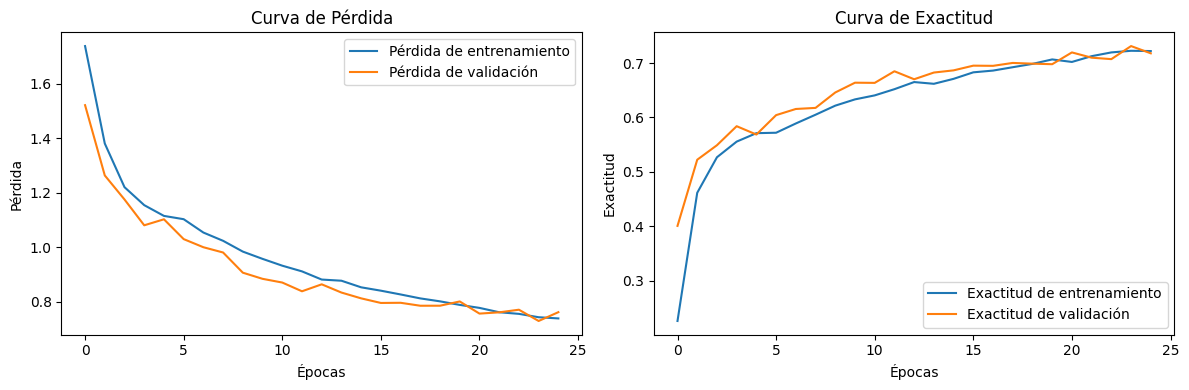

In [26]:
# Definición del gráfico
plt.figure(figsize=(12, 4))

# Curva de pérdida
plt.subplot(1, 2, 1)
plt.plot(history_cnn.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history_cnn.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.title('Curva de Pérdida')

# Curva de exactitud
plt.subplot(1, 2, 2)
plt.plot(history_cnn.history['accuracy'], label='Exactitud de entrenamiento')
plt.plot(history_cnn.history['val_accuracy'], label='Exactitud de validación')
plt.xlabel('Épocas')
plt.ylabel('Exactitud')
plt.legend()
plt.title('Curva de Exactitud')

plt.tight_layout()
plt.show()

#### Evaluación del modelo
Ahora vamos a evaluar el rendimiento del modelo en el conjunto de test:

In [27]:
# Evaluar el modelo en el conjunto de test
test_loss, test_accuracy = model_cnn.evaluate(test_X_norm, test_y_encoded)
print(f"\nPérdida en el conjunto de test: {test_loss}")
print(f"Exactitud en el conjunto de test: {test_accuracy}")

94/94 ━━━━━━━━━━━━━━━━━━━━ 19s 207ms/step - accuracy: 0.7695 - loss: 0.6423

Pérdida en el conjunto de test: 0.7611531019210815
Exactitud en el conjunto de test: 0.7179999947547913


#### Métricas adicionales y análisis de errores
Si deseas profundizar en el rendimiento del modelo, puedes generar el reporte de clasificación y la matriz de confusión:


94/94 ━━━━━━━━━━━━━━━━━━━━ 22s 230ms/step
Reporte de clasificación (CNN):
              precision    recall  f1-score   support

   buildings       0.80      0.57      0.67       437
      forest       0.80      0.91      0.85       474
     glacier       0.68      0.71      0.70       553
    mountain       0.72      0.63      0.67       525
         sea       0.57      0.73      0.64       510
      street       0.81      0.75      0.78       501

    accuracy                           0.72      3000
   macro avg       0.73      0.72      0.72      3000
weighted avg       0.73      0.72      0.72      3000



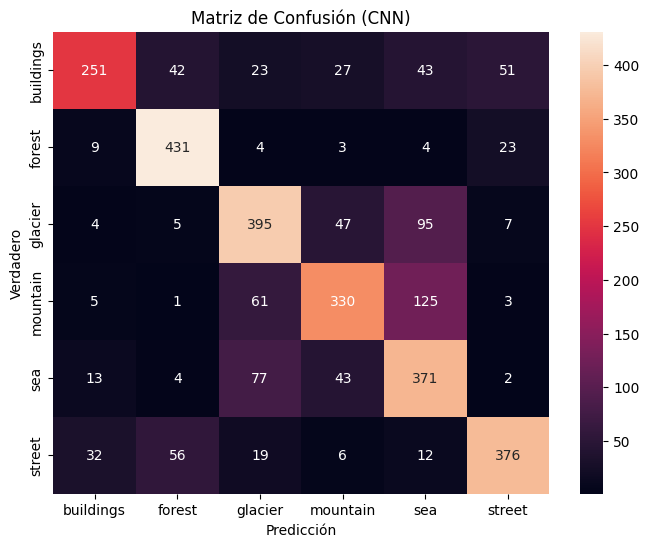

In [28]:
# Predecir las etiquetas del conjunto de test
test_predictions_cnn = model_cnn.predict(test_X_norm)
test_pred_indices_cnn = np.argmax(test_predictions_cnn, axis=1)
test_pred_labels_cnn = [classes[i] for i in test_pred_indices_cnn]

# Obtener las etiquetas verdaderas
test_true_indices = np.argmax(test_y_encoded, axis=1)
test_true_labels = [classes[i] for i in test_true_indices]

# Reporte de clasificación
print("Reporte de clasificación (CNN):")
print(classification_report(test_true_labels, test_pred_labels_cnn, target_names=classes))

# Matriz de confusión
conf_matrix_cnn = confusion_matrix(test_true_labels, test_pred_labels_cnn, labels=classes)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_cnn, annot=True, fmt='d', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicción')
plt.ylabel('Verdadero')
plt.title('Matriz de Confusión (CNN)')
plt.show()

Con esto, hemos desarrollado una CNN básica y analizado su rendimiento. En el siguiente paso, implementaremos una CNN más profunda para mejorar la capacidad de generalización.

---
## Paso 4: Implementación de una CNN mejorada
Ahora, construiremos una CNN más profunda con 16 o más capas (entre convolucionales y densas) para mejorar la capacidad de generalización. Evaluaremos su rendimiento y compararemos los resultados con el modelo anterior. También aplicaremos el modelo entrenado al conjunto de predicción y analizaremos las etiquetas donde el modelo comete más errores.

#### Construcción del modelo CNN mejorado

In [85]:
# Definir el modelo ajustado
model_cnn_deep = Sequential()

# Bloque 1
model_cnn_deep.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=train_X_norm.shape[1:]))
model_cnn_deep.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model_cnn_deep.add(MaxPooling2D((2, 2)))
model_cnn_deep.add(Dropout(0.25))

# Bloque 2
model_cnn_deep.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model_cnn_deep.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model_cnn_deep.add(MaxPooling2D((2, 2)))
model_cnn_deep.add(Dropout(0.25))

# Bloque 3
model_cnn_deep.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model_cnn_deep.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model_cnn_deep.add(MaxPooling2D((2, 2)))
model_cnn_deep.add(Dropout(0.25))

# Bloque 4
model_cnn_deep.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model_cnn_deep.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model_cnn_deep.add(GlobalAveragePooling2D())
model_cnn_deep.add(Dropout(0.25))

# Capas Densas
model_cnn_deep.add(Dense(1024, activation='relu'))
model_cnn_deep.add(Dropout(0.5))
model_cnn_deep.add(Dense(512, activation='relu'))
model_cnn_deep.add(Dropout(0.5))

# Capa de salida
model_cnn_deep.add(Dense(6, activation='softmax'))

# Compilar el modelo
model_cnn_deep.compile(optimizer=Adam(learning_rate=0.0001),
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])

#### Verificar la cantidad de parámetros

In [86]:
# Resumen del modelo
model_cnn_deep.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_65 (Conv2D)                   │ (None, 32, 32, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_66 (Conv2D)                   │ (None, 32, 32, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_31 (MaxPooling2D)      │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_41 (Dropout)                 │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_67 (Conv2D)                   │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_68 (Conv2D)                   │ (None, 16, 16, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_32 (MaxPooling2D)      │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_42 (Dropout)                 │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_69 (Conv2D)                   │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_70 (Conv2D)                   │ (None, 8, 8, 256)           │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_33 (MaxPooling2D)      │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_43 (Dropout)                 │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_71 (Conv2D)                   │ (None, 4, 4, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_72 (Conv2D)                   │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_44 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 1024)                │         525,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_45 (Dropout)                 │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_46 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 6)                   │           3,0

 Total params: 5,738,566 (21.89 MB)

 Trainable params: 5,738,566 (21.89 MB)

 Non-trainable params: 0 (0.00 B)

#### Entrenamiento del modelo

In [87]:
# Entrenar el modelo
history_cnn_deep = model_cnn_deep.fit(
    train_X_norm, train_y_encoded,
    validation_data=(test_X_norm, test_y_encoded),
    epochs=25,
    batch_size=64
)

Epoch 1/25
220/220 ━━━━━━━━━━━━━━━━━━━━ 586s 3s/step - accuracy: 0.1671 - loss: 1.7891 - val_accuracy: 0.1750 - val_loss: 1.7913
Epoch 2/25
220/220 ━━━━━━━━━━━━━━━━━━━━ 571s 2s/step - accuracy: 0.1728 - loss: 1.7914 - val_accuracy: 0.1750 - val_loss: 1.7905
Epoch 3/25
220/220 ━━━━━━━━━━━━━━━━━━━━ 558s 2s/step - accuracy: 0.1796 - loss: 1.7907 - val_accuracy: 0.1750 - val_loss: 1.7903
Epoch 4/25
220/220 ━━━━━━━━━━━━━━━━━━━━ 580s 2s/step - accuracy: 0.1823 - loss: 1.7804 - val_accuracy: 0.3827 - val_loss: 1.5296
Epoch 5/25
220/220 ━━━━━━━━━━━━━━━━━━━━ 562s 2s/step - accuracy: 0.3914 - loss: 1.4922 - val_accuracy: 0.4430 - val_loss: 1.3856
Epoch 6/25
220/220 ━━━━━━━━━━━━━━━━━━━━ 537s 2s/step - accuracy: 0.4506 - loss: 1.3893 - val_accuracy: 0.5007 - val_loss: 1.2719
Epoch 7/25
220/220 ━━━━━━━━━━━━━━━━━━━━ 551s 2s/step - accuracy: 0.5091 - loss: 1.2496 - val_accuracy: 0.5437 - val_loss: 1.1702
Epoch 8/25
220/220 ━━━━━━━━━━━━━━━━━━━━ 544s 2s/step - accuracy: 0.5426 - loss: 1.1556 - val_accu

#### Monitorear el Entrenamiento

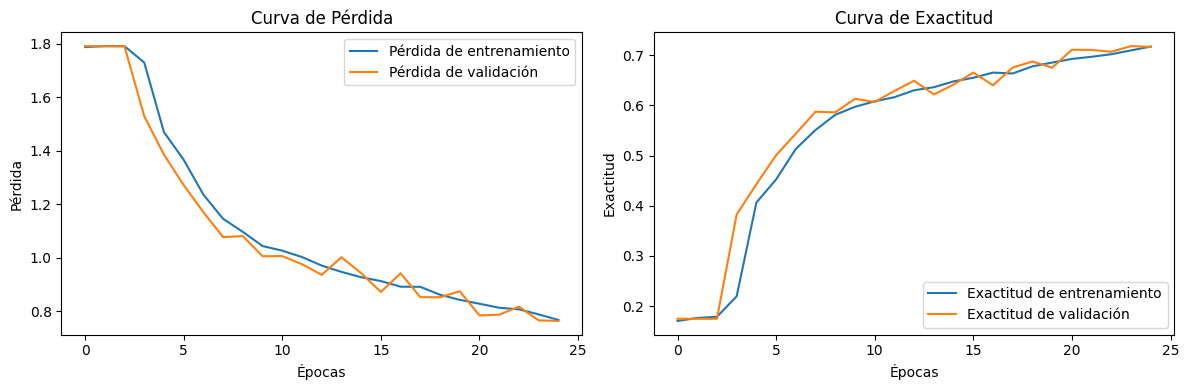

In [88]:
# Definición del gráfico
plt.figure(figsize=(12, 4))

# Curva de pérdida
plt.subplot(1, 2, 1)
plt.plot(history_cnn_deep.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history_cnn_deep.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.title('Curva de Pérdida')

# Curva de exactitud
plt.subplot(1, 2, 2)
plt.plot(history_cnn_deep.history['accuracy'], label='Exactitud de entrenamiento')
plt.plot(history_cnn_deep.history['val_accuracy'], label='Exactitud de validación')
plt.xlabel('Épocas')
plt.ylabel('Exactitud')
plt.legend()
plt.title('Curva de Exactitud')

plt.tight_layout()
plt.show()

#### Evaluación del modelo

In [89]:
# Evaluar el modelo
test_loss, test_accuracy = model_cnn_deep.evaluate(test_X_norm, test_y_encoded)
print(f"\nPérdida en el conjunto de test: {test_loss}")
print(f"Exactitud en el conjunto de test: {test_accuracy}")

94/94 ━━━━━━━━━━━━━━━━━━━━ 27s 288ms/step - accuracy: 0.7364 - loss: 0.7246

Pérdida en el conjunto de test: 0.763708233833313
Exactitud en el conjunto de test: 0.7163333296775818


#### Generar la Matriz de Confusión y el Reporte de Clasificación

94/94 ━━━━━━━━━━━━━━━━━━━━ 27s 283ms/step


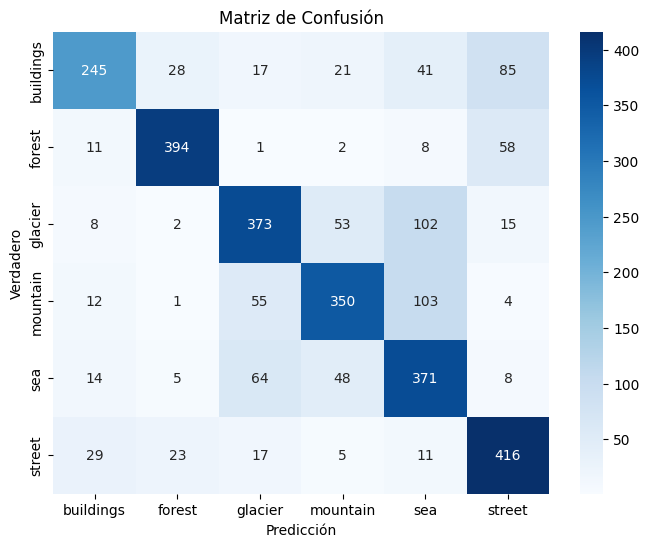

Reporte de clasificación:
              precision    recall  f1-score   support

   buildings       0.77      0.56      0.65       437
      forest       0.87      0.83      0.85       474
     glacier       0.71      0.67      0.69       553
    mountain       0.73      0.67      0.70       525
         sea       0.58      0.73      0.65       510
      street       0.71      0.83      0.77       501

    accuracy                           0.72      3000
   macro avg       0.73      0.72      0.72      3000
weighted avg       0.73      0.72      0.72      3000



In [90]:
# Predecir las etiquetas del conjunto de test
test_predictions = model_cnn_deep.predict(test_X_norm)
test_pred_indices = np.argmax(test_predictions, axis=1)
test_pred_labels = [classes[i] for i in test_pred_indices]

# Obtener las etiquetas verdaderas
test_true_indices = np.argmax(test_y_encoded, axis=1)
test_true_labels = [classes[i] for i in test_true_indices]

# Generar la matriz de confusión
conf_matrix = confusion_matrix(test_true_labels, test_pred_labels, labels=classes)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', xticklabels=classes, yticklabels=classes, cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Verdadero')
plt.title('Matriz de Confusión')
plt.show()

# Imprimir el reporte de clasificación
print("Reporte de clasificación:")
print(classification_report(test_true_labels, test_pred_labels, target_names=classes))

#### Comparación con el modelo anterior

Compararemos las métricas de rendimiento de ambos modelos para ver cuál ha obtenido mejores resultados.

#### Aplicación del modelo al conjunto de predicción

In [120]:
# Predecir las etiquetas del conjunto de predicción
predictions = model_cnn_deep.predict(pred_X_norm)
predicted_indices = np.argmax(predictions, axis=1)
predicted_labels = [classes[i] for i in predicted_indices]

229/229 ━━━━━━━━━━━━━━━━━━━━ 68s 296ms/step


#### Mostrar ocho imágenes aleatorias con las etiquetas de predicción

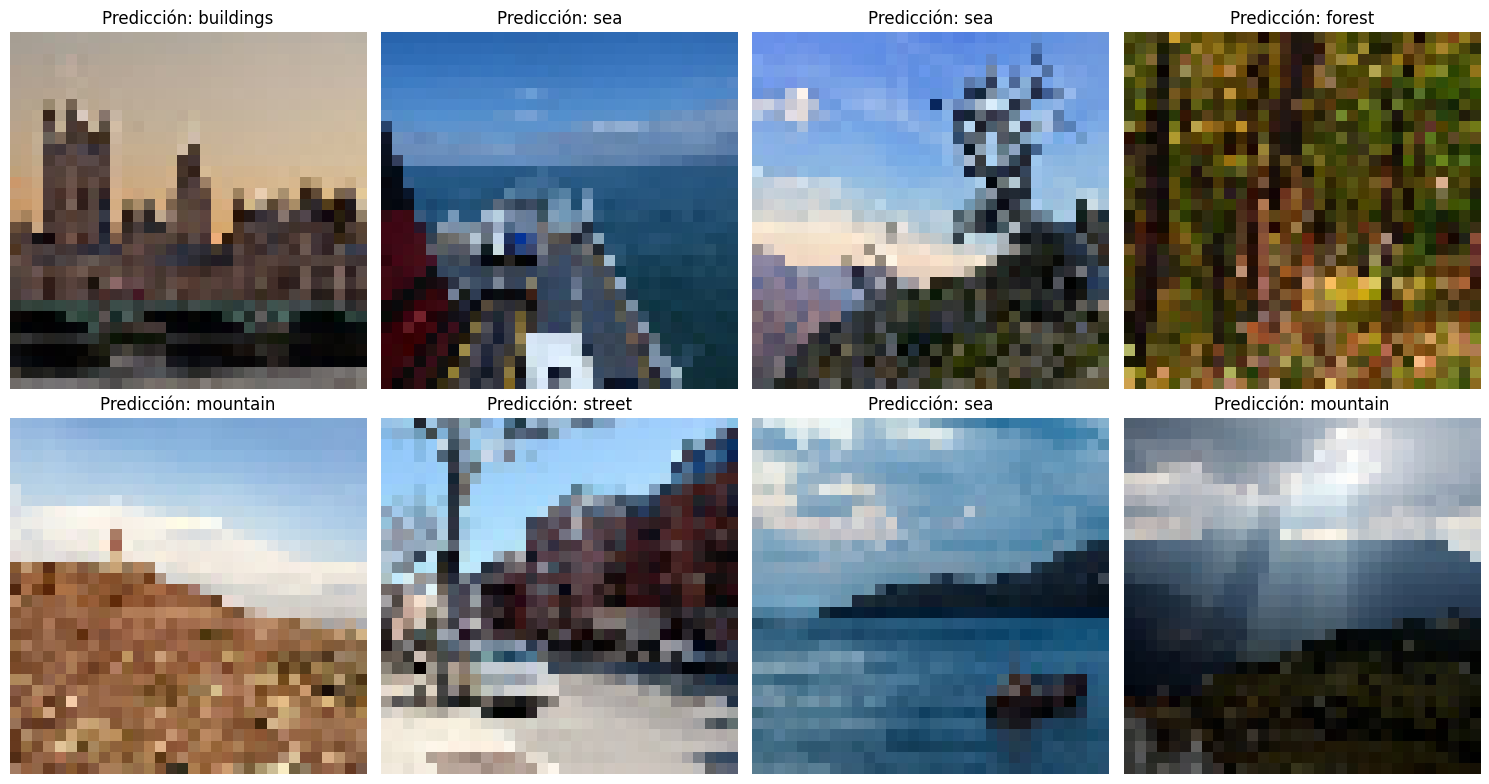

In [126]:
# Seleccionar 8 índices aleatorios del conjunto de predicción
import random
random_indices_pred = random.sample(range(pred_X_norm.shape[0]), 8)

# Crear subplots para mostrar las imágenes y sus predicciones
fig, axes = plt.subplots(2, 4, figsize=(15, 8))

for idx, ax in zip(random_indices_pred, axes.flatten()):
    image = pred_X[idx]
    ax.imshow(image)
    label = predicted_labels[idx]
    ax.set_title(f"Predicción: {label}")
    ax.axis('off')

plt.tight_layout()
plt.show()

#### Conclusión:

El modelo ha alcanzado una exactitud global del 72%, lo cual es una mejora respecto a los resultados anteriores. Veamos en detalle el desempeño por clase:

1. **Buildings**
  -  Precisión: 0.77
  - Recall: 0.56
  - F1-score: 0.65
  - Soporte: 437

  **Interpretación:** La precisión es alta, lo que indica que cuando el modelo predice "buildings", suele ser correcto. Sin embargo, el recall es bajo, lo que sugiere que el modelo no está identificando correctamente todas las imágenes de "buildings"; está pasando por alto algunas.


2. **Forest**
  - Precisión: 0.87
  - Recall: 0.83
  - F1-score: 0.85
  - Soporte: 474

  **Interpretación:** Excelente desempeño en esta clase. Tanto la precisión como el recall son altos, indicando que el modelo identifica correctamente la mayoría de las imágenes de "forest" y rara vez confunde otras clases con "forest".


3. **Glacier**
  - Precisión: 0.71
  - Recall: 0.67
  - F1-score: 0.69
  - Soporte: 553
  
  **Interpretación:** Desempeño moderado. El modelo tiene dificultades para identificar todas las imágenes de "glacier" y también confunde algunas otras clases con "glacier".


4. **Mountain**
  - Precisión: 0.73
  - Recall: 0.67
  - F1-score: 0.70
  - Soporte: 525

  **Interpretación:** Similar a "glacier", con un desempeño aceptable pero con margen de mejora en precisión y recall.


5. **Sea**
  - Precisión: 0.58
  - Recall: 0.73
  - F1-score: 0.65
  - Soporte: 510

  **Interpretación:** La precisión es baja, indicando que el modelo a menudo predice "sea" incorrectamente para imágenes de otras clases. Sin embargo, el recall es alto, lo que significa que el modelo está capturando la mayoría de las imágenes de "sea", aunque a costa de clasificar erróneamente otras imágenes como "sea".


6. **Street**
  - Precisión: 0.71
  - Recall: 0.83
  - F1-score: 0.77
  - Soporte: 501

  **Interpretación:** Buen desempeño en general. El modelo identifica correctamente la mayoría de las imágenes de "street" y rara vez confunde otras clases con "street".

---

#### Observaciones Generales

- **Clases con Mejores Resultados:** "Forest" y "Street" tienen altos valores de precisión y recall, lo que indica un buen desempeño del modelo en estas clases.

- **Clases con Desafíos:**
  - "Buildings": Tiene una precisión alta pero un recall bajo, lo que sugiere que el modelo no está detectando todas las imágenes de edificios.
  - "Sea": Presenta una precisión baja y un recall más alto, indicando que el modelo tiende a clasificar erróneamente imágenes de otras clases como "sea".